In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv('train_titanic.csv')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
pct_missig_data =round((df.isnull().sum()/df.isnull().count())*100,1)

In [78]:
pct_missig_data

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

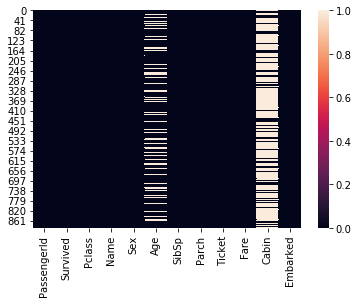

In [79]:
sns.heatmap(data = df.isnull())

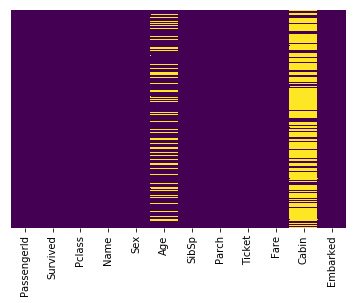

In [80]:
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False,cmap='viridis')

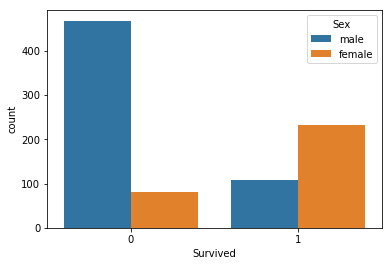

In [81]:
sns.countplot(x=df['Survived'],hue='Sex', data = df)

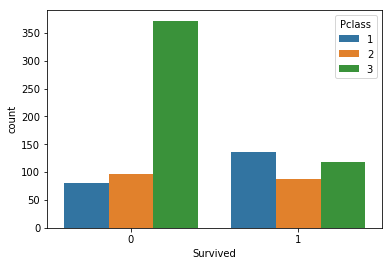

In [82]:
sns.countplot(x=df['Survived'],hue='Pclass', data = df)

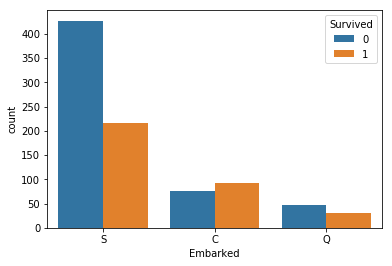

In [83]:
sns.countplot(x=df['Embarked'],hue='Survived', data = df)

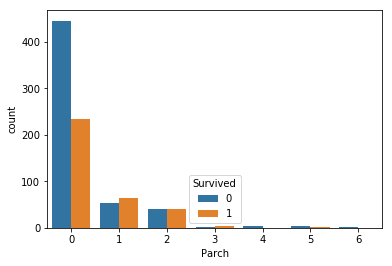

In [84]:
sns.countplot(data=df, x='Parch',hue='Survived')

In [85]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

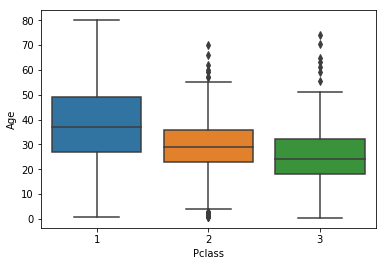

In [86]:
sns.boxplot(x='Pclass', y='Age', hue=None, data=df)

In [87]:
def fillNulls(age_class):
    age= age_class[0]
    pclass=age_class[1]    
    if(pd.isnull(age)):
        if(pclass==1):
            return 38
        elif(pclass==2):
            return 30
        else:
            return  25
    else:
        return age

In [88]:
 df['Age'] = df[['Age','Pclass']].apply(fillNulls,axis=1)

In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

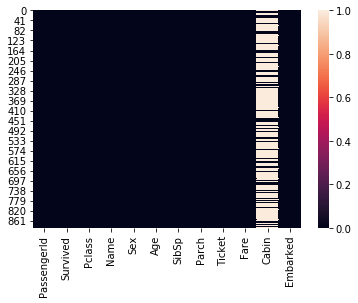

In [90]:
sns.heatmap(data= df.isnull())

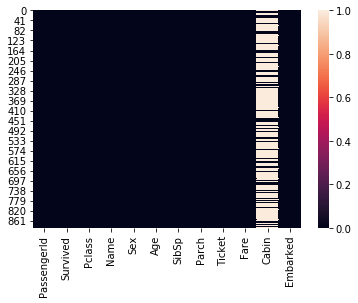

In [91]:
sns.heatmap(data= df.isnull())

In [117]:
df.drop('Cabin',axis = 1, inplace=True)

In [118]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


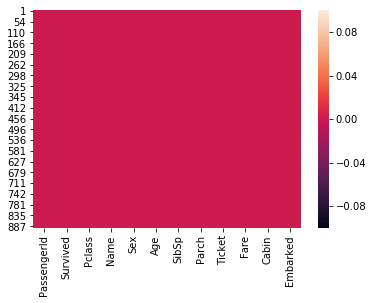

In [93]:
df.dropna(inplace=True)
sns.heatmap(data= df.isnull())

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
from sklearn.model_selection import train_test_split

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 11 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null object
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Embarked       202 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 28.9+ KB


In [137]:
sex_norm = pd.get_dummies(df['Sex'],drop_first=True)

In [138]:
sex_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 1 columns):
male    202 non-null uint8
dtypes: uint8(1)
memory usage: 11.8 KB


In [103]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [139]:
embarked_norm = pd.get_dummies(df['Embarked'],drop_first=True)

In [140]:
embarked_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 2 columns):
Q    202 non-null uint8
S    202 non-null uint8
dtypes: uint8(2)
memory usage: 12.0 KB


In [106]:
df['sex_norm']= sex_norm

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [108]:
df.drop('sex_norm',axis =1, inplace=True)

In [143]:
train = pd.concat([df,sex_norm,embarked_norm],axis = 1)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 14 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null object
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Embarked       202 non-null object
male           202 non-null uint8
Q              202 non-null uint8
S              202 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 29.5+ KB


In [145]:
X=train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']]

In [146]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 8 columns):
Pclass    202 non-null int64
Age       202 non-null float64
SibSp     202 non-null int64
Parch     202 non-null int64
Fare      202 non-null float64
male      202 non-null uint8
Q         202 non-null uint8
S         202 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.1 KB


In [147]:
y =df['Survived']

In [148]:
len(y)

202

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
lr= LogisticRegression()

In [155]:
lr.fit(X_train,  y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
lr.intercept_

array([ 1.97843157])

In [157]:
lr.coef_

array([[ 0.0118238 , -0.01658663,  0.39477458, -0.29090385,  0.0038606 ,
        -1.78065576, -0.12018015, -0.22163424]])

In [158]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [164]:
coefDf= pd.DataFrame(columns=X_train.columns, data=lr.coef_)

In [165]:
coefDf

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.011824,-0.016587,0.394775,-0.290904,0.003861,-1.780656,-0.12018,-0.221634


In [166]:
y_perd = lr.predict(X_test)

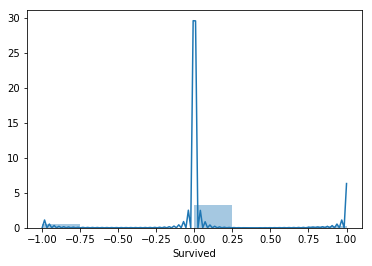

In [168]:
sns.distplot(y_perd-y_test)

In [169]:
from sklearn.metrics import  classification_report, confusion_matrix

In [172]:
print(classification_report(y_test, y_perd))
print(confusion_matrix(y_perd, y_test))

             precision    recall  f1-score   support

          0       0.59      0.76      0.67        17
          1       0.91      0.82      0.86        50

avg / total       0.83      0.81      0.81        67

[[13  9]
 [ 4 41]]
